In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [2]:
smdb = pd.read_csv('../Data/vgsales-12-4-2019-short.csv')
sglobal = pd.read_csv('../Data/vgsalesGlobale.csv')
pd.set_option('display.max_columns', None)

In [ ]:
smdb.head()

In [ ]:
sglobal.head()

In [ ]:
smdb.isna().sum()

In [ ]:
sglobal.isna().sum()

In [ ]:
smdb.info()

In [ ]:
sglobal.info()

In [ ]:
smdb_newdb = smdb[['Rank','Name', 'Global_Sales' ]] # Trying to combine the two dataframes

In [ ]:
# It wasn't working as intended after several tries
combined_db = sglobal.merge(smdb, left_on= 'Rank', right_on='Rank', how='inner')
combined_db

In [ ]:
combined_db.isna().sum()

In [ ]:
# Dropped my unwanted columns!
combined_dr = combined_db.drop(labels = ['Publisher_x', 'Year_x', 'Other_Sales_y', 'JP_Sales_y', 'Genre_y',
                                   'Platform_y', 'NA_Sales_y', 'Global_Sales_y', 'Total_Shipped', 'User_Score', 
                                  'Critic_Score', 'Platform_y', 'Name_y'], axis=1)
combined_dr

In [ ]:
combined_dr.isna().sum() # Dropping the columns with NaNs would have left me with the columns in the sglobal DF

In [3]:
sglobal.isna().sum()# So I am running with the sglobal DF

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [4]:
# Only about 320 NaNs so I am dropping them!
sglobal_clean = sglobal.dropna()
sglobal_clean

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [5]:
sglobal_clean = sglobal_clean.set_index("Rank") 

In [6]:
sglobal_clean.isna().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

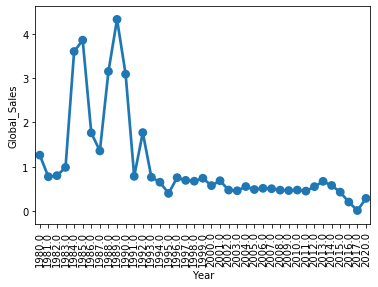

In [27]:
sns.pointplot('Year', 'Global_Sales', data=sglobal_clean, ci=False)
plt.xticks(rotation=90); # interesting plot

In [ ]:
sglobal_clean.head()

In [8]:
# Didn't think the name of the videogame would matter if I had the sales record so I dropped it
sglobal_clean.drop(columns=['Name'], axis=1, inplace=True)

In [ ]:
sglobal_clean.head()

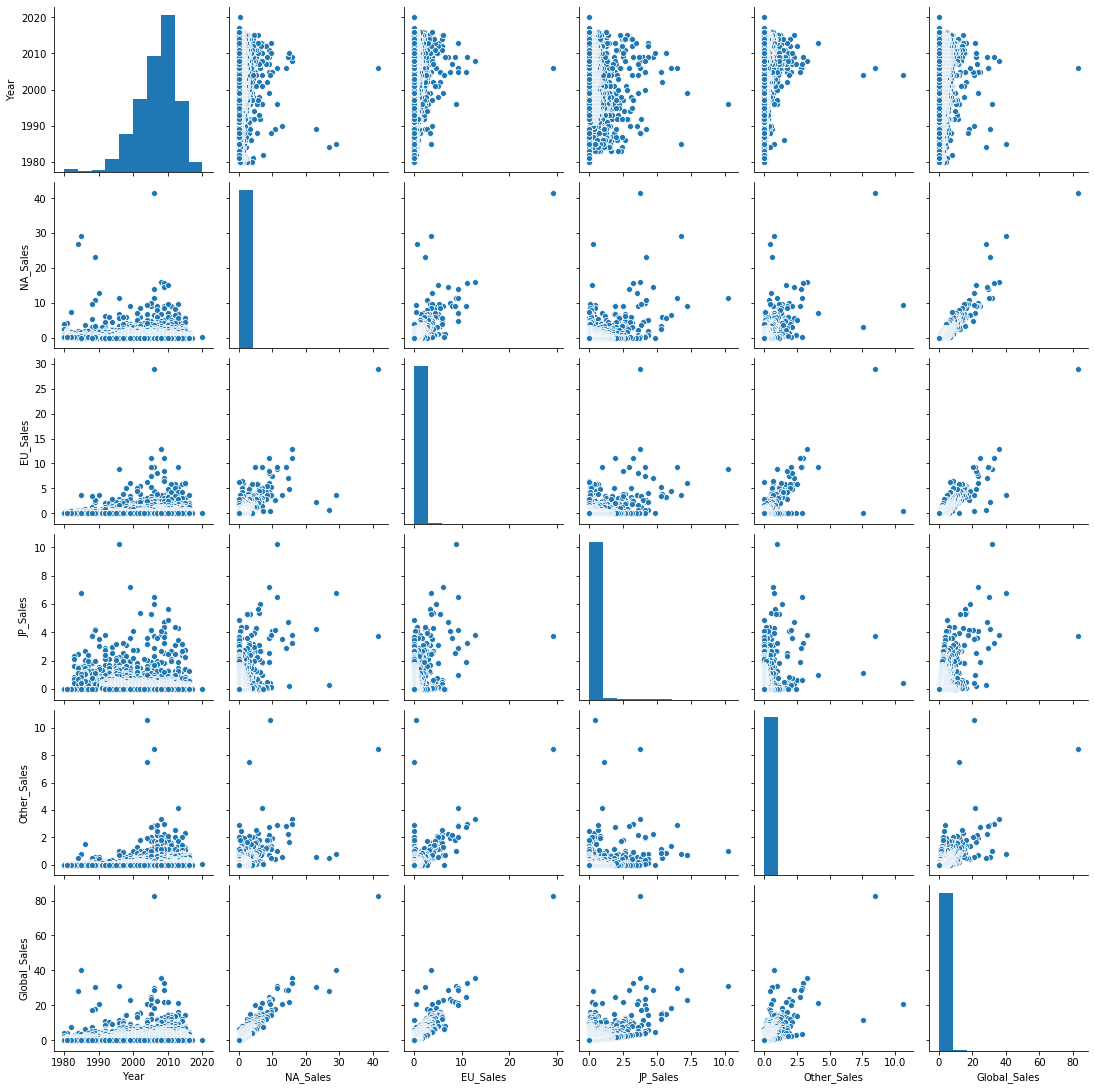

In [9]:
sns.pairplot(sglobal_clean, kind='scatter');

### Making FSM

In [10]:
# Instantiating Vars 
y = sglobal_clean['Global_Sales']
X = sglobal_clean.drop('Global_Sales', axis=1)

In [11]:
# Instantiating train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=42)

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [12]:
# One hotting categorical columns
ohe = OneHotEncoder(drop='first')

ohe.fit(X_train[['Platform', 'Genre', 'Publisher']])

ohe_cats = pd.DataFrame(ohe.transform(X_train[['Platform', 'Genre', 'Publisher']]).todense(), columns=ohe.get_feature_names(),
                       index=X_train.index)

ohe_cats.head()

,x0_3DO,x0_3DS,x0_DC,x0_DS,x0_GB,x0_GBA,x0_GC,x0_GEN,x0_GG,x0_N64,x0_NES,x0_NG,x0_PC,x0_PCFX,x0_PS,x0_PS2,x0_PS3,x0_PS4,x0_PSP,x0_PSV,x0_SAT,x0_SCD,x0_SNES,x0_TG16,x0_WS,x0_Wii,x0_WiiU,x0_X360,x0_XB,x0_XOne,x1_Adventure,x1_Fighting,x1_Misc,x1_Platform,x1_Puzzle,x1_Racing,x1_Role-Playing,x1_Shooter,x1_Simulation,x1_Sports,x1_Strategy,x2_1C Company,x2_20th Century Fox Video Games,x2_2D Boy,x2_3DO,x2_49Games,x2_505 Games,x2_5pb,x2_7G//AMES,x2_989 Studios,x2_AQ Interactive,x2_ASC Games,x2_ASCII Entertainment,x2_ASCII Media Works,x2_ASK,x2_Abylight,x2_Acclaim Entertainment,x2_Accolade,x2_Ackkstudios,x2_Acquire,x2_Activision,x2_Activision Blizzard,x2_Activision Value,x2_Adeline Software,x2_Aerosoft,x2_Agatsuma Entertainment,x2_Agetec,x2_Aksys Games,x2_Alawar Entertainment,x2_Alchemist,x2_Alternative Software,x2_Alvion,x2_American Softworks,x2_Angel Studios,x2_Answer Software,x2_Aqua Plus,x2_Arc System Works,x2_Arena Entertainment,x2_Arika,x2_ArtDink,x2_Aruze Corp,x2_Ascaron Entertainment GmbH,x2_Asgard,x2_Asmik Ace Entertainment,x2_Asmik Corp,x2_Aspyr,x2_Astragon,x2_Asylum Entertainment,x2_Atari,x2_Athena,x2_Atlus,x2_Avalon Interactive,x2_Avanquest,x2_Avanquest Software,x2_Axela,x2_BAM! Entertainment,x2_BMG Interactive Entertainment,x2_BPS,x2_Banpresto,x2_Benesse,x2_Berkeley,x2_Bethesda Softworks,x2_Big Ben Interactive,x2_Big Fish Games,x2_Bigben Interactive,x2_Black Bean Games,x2_Black Label Games,x2_Blast! Entertainment Ltd,x2_Blue Byte,x2_Bohemia Interactive,x2_Bomb,x2_Boost On,x2_Brash Entertainment,x2_Broccoli,x2_BushiRoad,x2_CBS Electronics,x2_CCP,x2_CDV Software Entertainment,x2_CPG Products,x2_Capcom,x2_Cave,x2_ChunSoft,x2_City Interactive,x2_Cloud Imperium Games Corporation,x2_Coconuts Japan,x2_Codemasters,x2_Codemasters Online,x2_CokeM Interactive,x2_Coleco,x2_Comfort,x2_Commseed,x2_Compile,x2_Compile Heart,x2_Conspiracy Entertainment,x2_Core Design Ltd.,x2_Crave Entertainment,x2_Creative Core,x2_Crimson Cow,x2_Crystal Dynamics,x2_Culture Brain,x2_Culture Publishers,x2_CyberFront,x2_Cygames,x2_D3Publisher,x2_DHM Interactive,x2_DSI Games,x2_DTP Entertainment,x2_Daedalic,x2_Daedalic Entertainment,x2_Daito,x2_Data Age,x2_Data Design Interactive,x2_Data East,x2_Datam Polystar,x2_Deep Silver,"x2_Destination Software, Inc",x2_Destineer,x2_Detn8 Games,x2_Devolver Digital,x2_DigiCube,x2_Disney Interactive Studios,x2_Dorart,x2_DreamCatcher Interactive,x2_DreamWorks Interactive,x2_Dusenberry Martin Racing,x2_EA Games,x2_EON Digital Entertainment,x2_ESP,x2_Easy Interactive,x2_Ecole,x2_Edia,x2_Eidos Interactive,x2_Electronic Arts,x2_Elf,x2_Elite,x2_Empire Interactive,x2_Encore,x2_Enix Corporation,x2_Enjoy Gaming ltd.,x2_Enterbrain,x2_Epic Games,x2_Epoch,x2_Ertain,x2_Essential Games,x2_Evolved Games,x2_Excalibur Publishing,x2_Experience Inc.,x2_Falcom Corporation,x2_Fields,x2_Flashpoint Games,x2_Flight-Plan,x2_Focus Home Interactive,x2_Focus Multimedia,x2_Foreign Media Games,x2_Fox Interactive,x2_From Software,x2_FuRyu,x2_FuRyu Corporation,x2_Fuji,x2_FunSoft,x2_Funbox Media,x2_Funcom,x2_Funsta,x2_G.Rev,x2_GN Software,x2_GOA,x2_GSP,x2_GT Interactive,x2_Gaga,x2_Gainax Network Systems,x2_Gakken,x2_Game Arts,x2_Game Factory,x2_Game Life,x2_GameMill Entertainment,x2_GameTek,x2_Gamebridge,x2_Gamecock,x2_Gameloft,x2_Gathering of Developers,x2_General Entertainment,x2_Genki,x2_Ghostlight,x2_Giga,x2_Giza10,x2_Global A Entertainment,x2_Global Star,x2_Gotham Games,x2_Graffiti,x2_Grand Prix Games,x2_Graphsim Entertainment,x2_Gremlin Interactive Ltd,x2_Griffin International,x2_Groove Games,x2_GungHo,x2_Gust,x2_HAL Laboratory,x2_HMH Interactive,x2_Hackberry,x2_Hamster Corporation,x2_Happinet,x2_Harmonix Music Systems,x2_Hasbro Interactive,x2_Headup Games,x2_Hearty Robin,x2_Hect,x2_Hello Games,x2_Her Interactive,x2_Hip Interactive,x2_Home Entertainment Suppliers,x2_Hudson Entertainment,x2_Hudson Soft,x2_Human Entertainment,x2_HuneX,x2_IE Institute,x2_ITT Family Games,x2_Iceberg Interactive,x2_Idea Factory,x2_Idea Factory International,x2_Ignition Ent

In [14]:
# Dropping the unnecessary columns
X_train.drop(columns=['Platform', 'Genre', 'Publisher'], axis=1, inplace=True)

KeyError: "['Platform' 'Genre' 'Publisher'] not found in axis"

In [15]:
X_train.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Rank,,,,,
1690,2007.0,0.45,0.47,0.00,0.28
663,2014.0,1.46,0.54,0.01,0.37
3760,2001.0,0.26,0.20,0.00,0.07
12418,2011.0,0.00,0.05,0.00,0.01
7352,2002.0,0.15,0.06,0.00,0.00


In [16]:
# Adding the one hotted columns back into the DF
X_train_ohe = pd.concat([X_train, ohe_cats], axis=1)
X_train_ohe

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,x0_3DO,x0_3DS,x0_DC,x0_DS,x0_GB,x0_GBA,x0_GC,x0_GEN,x0_GG,x0_N64,x0_NES,x0_NG,x0_PC,x0_PCFX,x0_PS,x0_PS2,x0_PS3,x0_PS4,x0_PSP,x0_PSV,x0_SAT,x0_SCD,x0_SNES,x0_TG16,x0_WS,x0_Wii,x0_WiiU,x0_X360,x0_XB,x0_XOne,x1_Adventure,x1_Fighting,x1_Misc,x1_Platform,x1_Puzzle,x1_Racing,x1_Role-Playing,x1_Shooter,x1_Simulation,x1_Sports,x1_Strategy,x2_1C Company,x2_20th Century Fox Video Games,x2_2D Boy,x2_3DO,x2_49Games,x2_505 Games,x2_5pb,x2_7G//AMES,x2_989 Studios,x2_AQ Interactive,x2_ASC Games,x2_ASCII Entertainment,x2_ASCII Media Works,x2_ASK,x2_Abylight,x2_Acclaim Entertainment,x2_Accolade,x2_Ackkstudios,x2_Acquire,x2_Activision,x2_Activision Blizzard,x2_Activision Value,x2_Adeline Software,x2_Aerosoft,x2_Agatsuma Entertainment,x2_Agetec,x2_Aksys Games,x2_Alawar Entertainment,x2_Alchemist,x2_Alternative Software,x2_Alvion,x2_American Softworks,x2_Angel Studios,x2_Answer Software,x2_Aqua Plus,x2_Arc System Works,x2_Arena Entertainment,x2_Arika,x2_ArtDink,x2_Aruze Corp,x2_Ascaron Entertainment GmbH,x2_Asgard,x2_Asmik Ace Entertainment,x2_Asmik Corp,x2_Aspyr,x2_Astragon,x2_Asylum Entertainment,x2_Atari,x2_Athena,x2_Atlus,x2_Avalon Interactive,x2_Avanquest,x2_Avanquest Software,x2_Axela,x2_BAM! Entertainment,x2_BMG Interactive Entertainment,x2_BPS,x2_Banpresto,x2_Benesse,x2_Berkeley,x2_Bethesda Softworks,x2_Big Ben Interactive,x2_Big Fish Games,x2_Bigben Interactive,x2_Black Bean Games,x2_Black Label Games,x2_Blast! Entertainment Ltd,x2_Blue Byte,x2_Bohemia Interactive,x2_Bomb,x2_Boost On,x2_Brash Entertainment,x2_Broccoli,x2_BushiRoad,x2_CBS Electronics,x2_CCP,x2_CDV Software Entertainment,x2_CPG Products,x2_Capcom,x2_Cave,x2_ChunSoft,x2_City Interactive,x2_Cloud Imperium Games Corporation,x2_Coconuts Japan,x2_Codemasters,x2_Codemasters Online,x2_CokeM Interactive,x2_Coleco,x2_Comfort,x2_Commseed,x2_Compile,x2_Compile Heart,x2_Conspiracy Entertainment,x2_Core Design Ltd.,x2_Crave Entertainment,x2_Creative Core,x2_Crimson Cow,x2_Crystal Dynamics,x2_Culture Brain,x2_Culture Publishers,x2_CyberFront,x2_Cygames,x2_D3Publisher,x2_DHM Interactive,x2_DSI Games,x2_DTP Entertainment,x2_Daedalic,x2_Daedalic Entertainment,x2_Daito,x2_Data Age,x2_Data Design Interactive,x2_Data East,x2_Datam Polystar,x2_Deep Silver,"x2_Destination Software, Inc",x2_Destineer,x2_Detn8 Games,x2_Devolver Digital,x2_DigiCube,x2_Disney Interactive Studios,x2_Dorart,x2_DreamCatcher Interactive,x2_DreamWorks Interactive,x2_Dusenberry Martin Racing,x2_EA Games,x2_EON Digital Entertainment,x2_ESP,x2_Easy Interactive,x2_Ecole,x2_Edia,x2_Eidos Interactive,x2_Electronic Arts,x2_Elf,x2_Elite,x2_Empire Interactive,x2_Encore,x2_Enix Corporation,x2_Enjoy Gaming ltd.,x2_Enterbrain,x2_Epic Games,x2_Epoch,x2_Ertain,x2_Essential Games,x2_Evolved Games,x2_Excalibur Publishing,x2_Experience Inc.,x2_Falcom Corporation,x2_Fields,x2_Flashpoint Games,x2_Flight-Plan,x2_Focus Home Interactive,x2_Focus Multimedia,x2_Foreign Media Games,x2_Fox Interactive,x2_From Software,x2_FuRyu,x2_FuRyu Corporation,x2_Fuji,x2_FunSoft,x2_Funbox Media,x2_Funcom,x2_Funsta,x2_G.Rev,x2_GN Software,x2_GOA,x2_GSP,x2_GT Interactive,x2_Gaga,x2_Gainax Network Systems,x2_Gakken,x2_Game Arts,x2_Game Factory,x2_Game Life,x2_GameMill Entertainment,x2_GameTek,x2_Gamebridge,x2_Gamecock,x2_Gameloft,x2_Gathering of Developers,x2_General Entertainment,x2_Genki,x2_Ghostlight,x2_Giga,x2_Giza10,x2_Global A Entertainment,x2_Global Star,x2_Gotham Games,x2_Graffiti,x2_Grand Prix Games,x2_Graphsim Entertainment,x2_Gremlin Interactive Ltd,x2_Griffin International,x2_Groove Games,x2_GungHo,x2_Gust,x2_HAL Laboratory,x2_HMH Interactive,x2_Hackberry,x2_Hamster Corporation,x2_Happinet,x2_Harmonix Music Systems,x2_Hasbro Interactive,x2_Headup Games,x2_Hearty Robin,x2_Hect,x2_Hello Games,x2_Her Interactive,x2_Hip Interactive,x2_Home Entertainment Suppliers,x2_Hudson Entertainment,x2_Hudson Soft,x2_Human Entertainment,x2_HuneX,x2_IE Institute,x2_ITT Family Games,x2_Iceberg Interactive,x2_Idea Factory,x

In [17]:
dtr = DecisionTreeRegressor(random_state=42)

dtr.fit(X_train_ohe, y_train)

DecisionTreeRegressor(random_state=42)

In [18]:
dtr.score(X_train_ohe, y_train)

0.9999999284048434

In [19]:
cross_val_score(dtr, X_train_ohe, y=y_train, cv = 5).mean()

0.9408919438308198

### Trying a Time Series Model